In [1]:
%matplotlib inline
from keras.datasets import imdb
import matplotlib.pyplot as plt
import numpy as np
import nltk
from sklearn.model_selection import train_test_split

max_length = 0

Using TensorFlow backend.


In [2]:
with open('./data/training.txt', 'r') as f:
    data = [v.rstrip('\n').split('\t') for v in f.readlines()]

word_freq = dict()
data_num = len(data)
for row in data:
    words = nltk.word_tokenize(row[1].strip().lower())
    max_length = max(max_length, len(words))
    for word in words:
        if word not in word_freq:
            word_freq[word] = 0
        word_freq[word] += 1

segment_len = min(9999, max_length)
vocab_size = len(word_freq) + 2
word2index = {x: i+2 for i, x in enumerate(word_freq)}
word2index["PAD"] = 0
word2index["UNK"] = 1
index2word = {v:k for k, v in word2index.items()}

x = np.empty(data_num, dtype=list)
y = np.zeros(data_num)
for i, row in enumerate(data):
    label, sentence = row
    words = nltk.word_tokenize(sentence.strip().lower())
    seqs = []
    for word in words:
        if word in word2index:
            seqs.append(word2index[word])
        else:
            seqs.append(word2index["UNK"])
    x[i] = seqs
    y[i] = int(label)

tmp_x, te_x, tmp_y, te_y = train_test_split(x, y, test_size=0.2, random_state=1)

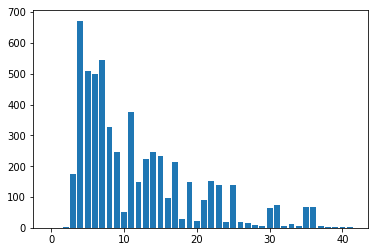

In [3]:
length = [0] * max_length
for x in tmp_x:
    length[len(x)-1] += 1

plt.bar([i for i in range(max_length)], length)
plt.show()

In [8]:
# count usable ratio with max length
print(max_length)
print(sum([len(v) for v in tmp_x]) / (max_length*len(tmp_x)))
# print(sum([len(v) for v in tmp_x]) / (36*len(tmp_x)))

42
0.303689047955103


In [6]:
tmp = 0
for idx, v in enumerate(length):
    tmp += v
    if tmp > len(tmp_x) * 0.995:
        print(idx)
        break

36
